# Paso 1. Descripción de los datos




In [3]:
# Importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# Cargar los datos de todos los DF
instacart_orders = pd.read_csv('instacart_orders.csv', sep=';')
products = pd.read_csv('products.csv', sep=';')
order_products = pd.read_csv('order_products.csv', sep=';')
aisles = pd.read_csv('aisles.csv', sep=';')
departments = pd.read_csv('departments.csv', sep=';')


In [5]:
# Revisar la estructura del DF instacart_orders
print("Instacart_Orders DataFrame:")
instacart_orders.info()

Instacart_Orders DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [6]:
# Revisar la estructura del DF products
print("Products DataFrame:")
products.info()

Products DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [7]:
# Revisar la estructura del DF Order_Products
print("Order_Products DataFrame:")
order_products.info()

Order_Products DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [8]:
# Revisar la estructura del DF Aisles
print("Aisles DataFrame:")
aisles.info()

Aisles DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [9]:
# Revisar la estructura del DF Departments
print("Departments DataFrame:")
departments.info()

Departments DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


## Conclusiones

Instacart_Orders DataFrame:

    Tiene 478,967 filas y 6 columnas.
    La columna days_since_prior_order tiene 28,819 valores faltantes.
    
Products DataFrame:

    Tiene 49,694 filas y 4 columnas.
    La columna product_name tiene 1258 valores faltantes.
    
Order_Products DataFrame:

    Este es el más grande, con 4,545,007 filas.
    No hay valores faltantes.
    La columna add_to_cart_order, que está en formato float64, probablemente debería ser un entero.

Aisles DataFrame:

    Tiene 134 filas y 2 columnas.
    No hay valores faltantes.

Departments DataFrame:

    Tiene 21 filas y 2 columnas.
    Tampoco hay valores faltantes.

# Paso 2. Preprocesamiento de los datos



### `instacart_orders` data frame

In [10]:
# Revisar duplicados
print(instacart_orders.duplicated().sum())

15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [11]:
# Verificar todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wed_2am_orders = instacart_orders[
    (instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)
]
print(wed_2am_orders)
print(wed_2am_orders.duplicated().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado? Que todos los duplicados son del día miércoles a las 2 am.

In [12]:
# Eliminar los pedidos duplicados
instacart_orders.drop_duplicates(inplace=True)

In [13]:
# Verificar si hay filas duplicadas
print(instacart_orders.duplicated().sum())

0


In [14]:
# Verificar si hay IDs duplicados de pedidos
duplicated_order_ids = instacart_orders['order_id'].duplicated().sum()
print(f"IDs duplicados de pedidos: {duplicated_order_ids}")

IDs duplicados de pedidos: 0


Verifiqué los duplicados con la función duplicated().sum(). Al ver que sí existen, revisé los pedidos que se hicieron el miércoles a las 2 am y descubrí que todos los duplicados se encuentran ahí. Finalmente, eliminé los duplicados y verifiqué que se hizo correctamente. 

### `products` data frame

In [15]:
# Verificar si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [16]:
# Verificar si hay IDs duplicadas de productos (duplicados tramposos)
print(products['product_id'].duplicated().sum())

0


In [17]:
# Revisar si hay nombres duplicados de productos (convertir los nombres a letras mayúsculas para compararlos mejor)
duplicated_product_names = products['product_name'].str.upper().duplicated().sum()
print(f"Cantidad de nombres duplicados de productos: {duplicated_product_names}")

Cantidad de nombres duplicados de productos: 1361


In [18]:
# Revisar si hay nombres duplicados de productos no faltantes
duplicated_non_missing_product_names = products[products['product_name'].notna()]['product_name'].str.upper().duplicated().sum()
print(f"Cantidad de nombres duplicados de productos no faltantes: {duplicated_non_missing_product_names}")

Cantidad de nombres duplicados de productos no faltantes: 104


Verifiqué si tenía filas totalmente duplicadas y si hay IDs duplicados.  Después, revisé su había nombres duplicados de productos (product_name), y hay 1361. Aquí mismo se cambiaron los nombres a letras mayúsculas para evitar errores de sintaxis. Finalmente, se revisó si había nombres duplicados de productos no faltantes mediante el booleano notna, y descubrí que hay 104.

### `departments` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [20]:
# Revisa si hay IDs duplicadas de productos
print(departments['department_id'].duplicated().sum())

0


No existen filas totalmente duplicadas ni IDs duplicadas (department_id).

### `aisles` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [22]:
# Revisa si hay IDs duplicadas de productos
print(aisles['aisle_id'].duplicated().sum())

0


No existen filas totalmente duplicadas ni IDs duplicadas (department_id).

### `order_products` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [24]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicated_orders_products = order_products.duplicated(subset=['order_id', 'product_id'])
print(duplicated_orders_products.sum())

0


Revisé si había filas totalmente duplicadas y no lo hay. Para verificar cualquier otro duplicado engañoso, opté por revisar duplicados en las columnas ID y tampoco lo hay. 

## Valores ausentes

### `products` data frame

In [25]:
# Valores ausentes en la columna 'product_name'
print(products['product_name'].isna().sum())

1258


Se encontraron 1258 valores ausentes en la columna 'product_name'

In [26]:
# Nombres de productos ausentes en el pasillo con ID 100
products_in_aisle_100 = products[products['aisle_id'] == 100]
total_nan_in_aisle_100 = products_in_aisle_100['product_name'].isna().sum()
print("Total de productos con nombre ausente en el pasillo con ID 100:", total_nan_in_aisle_100)

Total de productos con nombre ausente en el pasillo con ID 100: 1258


Se confirmó que todos los valores ausentes de la columna 'product_name' se encuentran en el pasillo con ID 100

In [27]:
# Nombres de productos ausentes en el departamento con ID 21
products_in_department_21 = products[products['department_id'] == 21]
products_in_department_21 = products_in_department_21['product_name'].isna().sum()
print("Total de productos con nombre ausente en el departamento con ID 21:", products_in_department_21)

Total de productos con nombre ausente en el departamento con ID 21: 1258


Se confirmó que todos los valores ausentes de la columna 'product_name' se encuentran en el departamento con ID 21.

In [28]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
filtered_products = products[(products['aisle_id'] == 100) & (products['department_id'] == 21)]
print (filtered_products)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Se puede ver que, en la columna product_name, únicamente se encuentran valores ausentes (NaN). Y que, efectivamente, aisle_id = 100 y department_id = 21. Lo único que cambia es el product_id. Es posible que los nombres de estos productos no se hayan registrado correctamente o que no se haya realizado el proceso de asignación de nombres en ese pasillo/departamento en particular. 

In [29]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
print(products['product_name'].isna().sum())

0


Con la función fillna, los valores ausentes se llenaron con el string 'unknown'.

### `instacart_orders` data frame

In [30]:
# Encontrar los valores ausentes
print(instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [31]:
# Valores ausentes en el primer pedido del cliente
order_1 = instacart_orders[instacart_orders['order_number'] == 1]
total_nan_in_order_1 = order_1['days_since_prior_order'].isna().sum()
print("El total de valores ausentes en el primer pedido del cliente es:", total_nan_in_order_1)

El total de valores ausentes en el primer pedido del cliente es: 28817


Confirmé que todos los valores ausentes pertenecen al primer pedido del cliente.

### `order_products` data frame

In [32]:
# Encuentra los valores ausentes
print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [33]:
# Valores mínimos y máximos en esta columna
maximo = order_products['add_to_cart_order'].max()
print("El valor máximo es:",maximo)
minimo = order_products['add_to_cart_order'].min()
print("El valor máximo es:",minimo)

El valor máximo es: 64.0
El valor máximo es: 1.0


La única columna que presenta valores ausentes es add_to_cart_order. Dentro de esta, su valor mínimo es 1 y su máximo 64.

In [34]:
# Guardar todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_add_to_cart = order_products[order_products['add_to_cart_order'].isna()]
missing_order_ids = missing_add_to_cart['order_id']
print(missing_order_ids)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupar todos los pedidos con datos ausentes por su ID de pedido.
# Contar el número de 'product_id' en cada pedido y revisar el valor mínimo del conteo.
missing_add_to_cart = order_products[order_products['add_to_cart_order'].isna()]
grouped_orders = missing_add_to_cart.groupby('order_id')['product_id'].count()
min_count = grouped_orders.min()
print("El número mínimo de productos en un pedido con valores ausentes es:", min_count)

El número mínimo de productos en un pedido con valores ausentes es: 1


Obtuve los IDs de los pedidos que tienen un valor ausente en 'add_to_cart_order' y después conté el número de 'product_id' habiendo agrupado por order. Al final, se obtuvo el valor mínimo de dicho conteo, el cual es igual a 1. Por lo que se deduce que NO todos los pedidos con valores ausentes tienen más de 64 productos.

In [36]:
# Remplazar los valores ausentes en la columna 'add_to_cart? con 999 y convertir la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
print(order_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int32
 3   reordered          int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB
None


C:\Users\elias\AppData\Local\Temp\ipykernel_8244\476451862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_products['add_to_cart_order'].fillna(999, inplace=True)


Reemplacé los valores ausentes de la columna 'add_to_cart_order' por 999 y después convertí la columna a enteros, pues es el tipo de datos que le corresponde a la columna.

## Conclusiones

El paso 2, de preprocesamiento de datos, es algo indispensable para poder analizar los datos. Básicamente, encontré los valores ausentes/nulos y duplicados y después tomé acción sobre ellos para poder analizarlo. Durante el proceso, identifiqué ciertos patrones que te indican que los valores ausentes se deben a cierto departamento, pasillo u otra situación. 

# Paso 3. Análisis de los datos


### Verificar que los valores son sensibles (lógicos)

In [ ]:
# Verificar que los valores de la hora del día son lógicos
print(instacart_orders['order_hour_of_day'].min())
print(instacart_orders['order_hour_of_day'].max())

0
23


In [ ]:
# Verificar que los valores del día de la semana son lógicos
print(instacart_orders['order_dow'].min())
print(instacart_orders['order_dow'].max())

0
6


Los valores en ambas columnas son razonables. Obtuve el mínimo y el máximo de cada una de ellas y efectivamente sus valores oscilan entre los valores adecuados. 

### Para cada hora del día, ¿cuántas personas hacen órdenes?

order_hour_of_day
0      2991
1      1671
2       958
3       744
4       735
5      1281
6      3757
7     10993
8     20268
9     28112
10    32195
11    32660
12    31754
13    32433
14    32797
15    32894
16    31579
17    26825
18    21795
19    17026
20    12891
21     9806
22     7670
23     5167
Name: user_id, dtype: int64


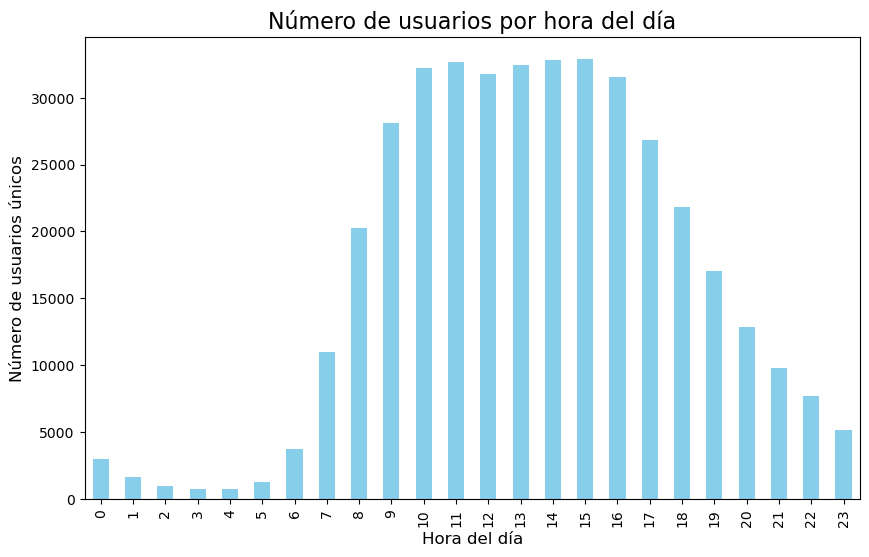

In [ ]:
# Graficar el número de personas que hacen órdenes para cada hora del día
users_per_hour = instacart_orders.groupby('order_hour_of_day')['user_id'].nunique() 
print(users_per_hour)
users_per_hour.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Número de usuarios por hora del día', fontsize=16)
plt.xlabel('Hora del día', fontsize=12)
plt.ylabel('Número de usuarios únicos', fontsize=12)
plt.show()

Agrupé la columna 'order_hour_of_day' y utilicé la función nunique() para obtener el número de personas que hacen órdenes. Como se puede ver en la gráfica, entre las horas 10 y 16 se encuentran el mayor número de usuarios únicos. 

### ¿Qué día de la semana compran víveres las personas?

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64


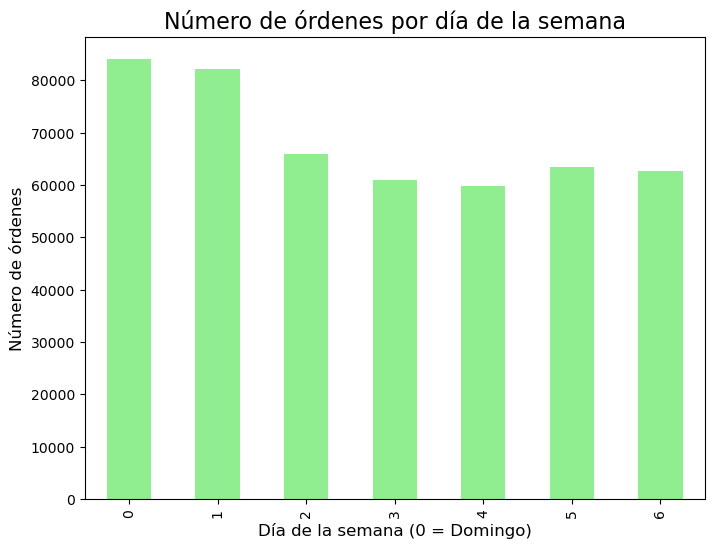

In [ ]:
# Compras por día de la semana
orders_by_day = instacart_orders.groupby('order_dow')['order_id'].count()
print(orders_by_day)
orders_by_day.plot(kind='bar', figsize=(8, 6), color='lightgreen')
plt.title('Número de órdenes por día de la semana', fontsize=16)
plt.xlabel('Día de la semana (0 = Domingo)', fontsize=12)
plt.ylabel('Número de órdenes', fontsize=12)
plt.show()

Las personas compran víveres todos los días de la semana. Como dato adicional, el domingo es el día que más compran y el jueves el día que menos compran.

### ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? 

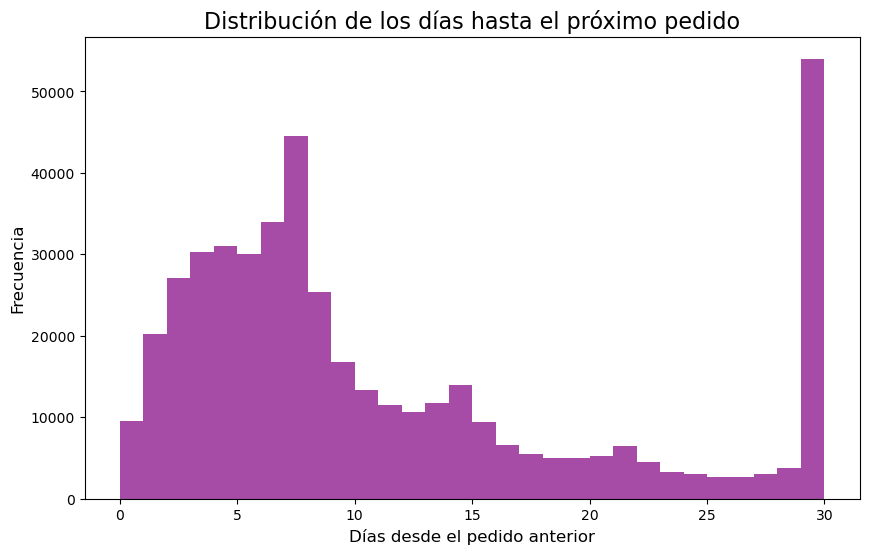

El número mínimo de días hasta el próximo pedido es: 0.0
El número máximo de días hasta el próximo pedido es: 30.0
El promedio de días hasta el próximo pedido es: 11.101813900274362


In [ ]:
# Tiempo que esperan las personas hasta hacer otro pedido
min_days = instacart_orders['days_since_prior_order'].min()
max_days = instacart_orders['days_since_prior_order'].max()
mean_days = instacart_orders['days_since_prior_order'].mean()
instacart_orders['days_since_prior_order'].plot(kind='hist', bins=30, figsize=(10, 6), color='purple', alpha=0.7)
plt.title('Distribución de los días hasta el próximo pedido', fontsize=16)
plt.xlabel('Días desde el pedido anterior', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()
print(f"El número mínimo de días hasta el próximo pedido es: {min_days}")
print(f"El número máximo de días hasta el próximo pedido es: {max_days}")
print(f"El promedio de días hasta el próximo pedido es: {mean_days}")

Las personas esperan entre 0 y 30 días para hacer otro pedido, mientras que el promedio es de 11.1 días. Una gran parte de la distribución se encuentra entre 0 y 10 días. Después, va decayendo hasta que llega a 30, en

### Diferencia entre miércoles y sábados para  `'order_hour_of_day'`.

In [ ]:
# Importar la librería
import matplotlib.pyplot as plt

In [ ]:
# Extraer sábados y miércoles 
orders_wednesday = instacart_orders[instacart_orders['order_dow'] == 3]
orders_saturday = instacart_orders[instacart_orders['order_dow'] == 6]

In [ ]:
# Hacer el conteo 
hourly_orders_wed = orders_wednesday['order_hour_of_day'].value_counts().sort_index()
hourly_orders_sat = orders_saturday['order_hour_of_day'].value_counts().sort_index()

In [ ]:
# Imprimir resultados
print (hourly_orders_wed)
print (hourly_orders_sat)

order_hour_of_day
0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: count, dtype: int64
order_hour_of_day
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: count, dtype: int64


                   Miércoles  Sábado
order_hour_of_day                   
0                        373     464
1                        215     254
2                        106     177
3                        101     125
4                        108     118
5                        170     161
6                        643     451
7                       1732    1619
8                       3125    3246
9                       4490    4311


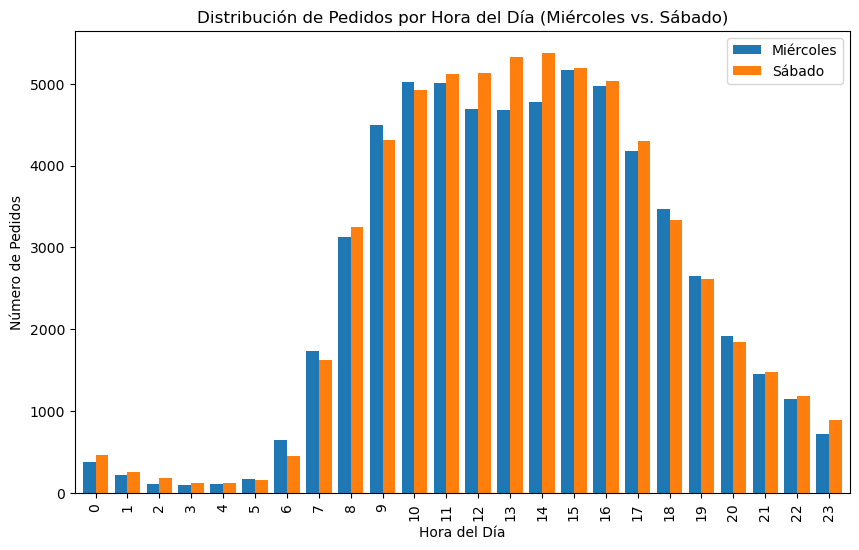

In [ ]:
# Convertir los resultados en DF y graficar
df = pd.DataFrame({'Miércoles': hourly_orders_wed, 'Sábado': hourly_orders_sat})
print (df.head(10))
df.plot(kind='bar', figsize=(10,6), width=0.8, title='Distribución de Pedidos por Hora del Día (Miércoles vs. Sábado)', xlabel='Hora del Día', ylabel='Número de Pedidos', legend=True)
plt.show()

Las distribuciones de ambos días son relativamente similares. El valor mínimo, máximo y total del número de pedidos es ligeramente superior el del sábado. Aunque en ciertas horas, como la 9 o 10, hay más pedidos el miércoles.

### ¿Cuál es la distribución para el número de pedidos por cliente?

In [ ]:
# Imprimir muestra y total de filas del DF
print(instacart_orders['user_id'].count())
print(instacart_orders['user_id'].min())
print(instacart_orders.sample(10))

478952
2
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
360710   3079988    93310             9          3                 13   
42887    3000874    13816             8          2                 10   
332314   1258727    19344            14          4                 13   
100866   3186718   146119            33          0                 19   
300684    425032   189069             8          1                  9   
366110    381217   159891            22          6                 14   
60987    2377414    75669             4          3                 20   
174292   1503512    64506             2          4                 14   
448270   3237460     7829            16          0                 18   
61308    3288381    16546             9          1                 23   

        days_since_prior_order  
360710                     2.0  
42887                      6.0  
332314                    14.0  
100866                     0.0  
300684                

In [ ]:
# Total de ordenes por cliente y ordenamiento
customer_order_counts = instacart_orders.groupby('user_id')['order_id'].count()
print(customer_order_counts.head(10))
order_distribution = customer_order_counts.value_counts().sort_index()
print(order_distribution.head(10))

user_id
2     2
4     2
5     1
6     2
7     2
10    1
11    2
12    1
13    3
14    4
Name: order_id, dtype: int64
order_id
1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
Name: count, dtype: int64


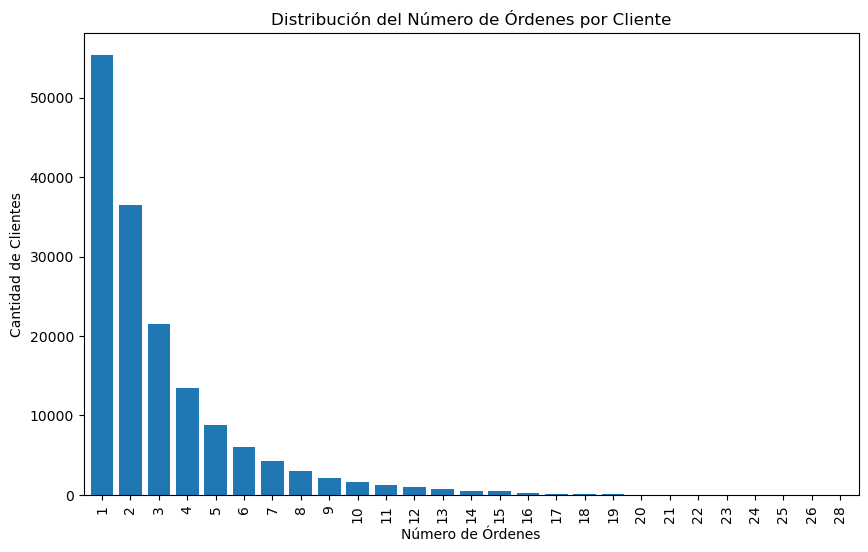

In [ ]:
# Graficar total de órdenes por cliente
order_distribution.plot(kind='bar', figsize=(10,6), width=0.8, title='Distribución del Número de Órdenes por Cliente', xlabel='Número de Órdenes', ylabel='Cantidad de Clientes')
plt.show()

Grafiqué el número de órdenes que realizan los clientes. Como es lógico, entre menos órdenes, mayor cantidad de clientes.

### ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
# Imprimir muestra
print(order_products.sample(5))

         order_id  product_id  add_to_cart_order  reordered
1262169   2943609        8571                  4          1
2365686   2087777       25706                 12          1
1872468    588770       18362                  6          1
3845066    357170       47209                  1          1
1355254   2976176       23734                 20          0


In [ ]:
# Productos mas populares (número de veces ordenado)
top_products = order_products['product_id'].value_counts().head(20)
print (top_products)
top_products_df = top_products.to_frame().reset_index()
top_products_df.columns = ['product_id', 'count']
print(top_products_df)
top_products_with_names = top_products_df.join(products.set_index('product_id')['product_name'], on='product_id')
print(top_products_with_names)

product_id
24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: count, dtype: int64
    product_id  count
0        24852  66050
1        13176  53297
2        21137  37039
3        21903  33971
4        47209  29773
5        47766  24689
6        47626  21495
7        16797  20018
8        26209  19690
9        27845  19600
10       27966  19197
11       22935  15898
12       24964  15292
13       45007  14584
14       39275  13879
15       49683  13675
16       28204  12544
17        5876  12232
18        8277  11993
19       40706  11781
    product_id  count              product_name
0        24852  66050                    Banana
1        13176  53297    Bag of Organic Bananas
2        21137  37039      Organic Strawberries
3        

La función value_counts() contó el número de valores basado en la columna 'product_id' y con la funcion head se obtuvieron los primeros 20 valores. Después lo convertí a un dataframe y reseteé el ídice. Finalmente le agregué el nombre a su product_id correspondiente. 

### ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
# Imprimir librerías
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Visualizar la orden 2331657 para mayor entendimiento
ejemplo = order_products[order_products['order_id'] == 2331657]
print(ejemplo)

         order_id  product_id  add_to_cart_order  reordered
348184    2331657       39475                  3          1
410085    2331657       46069                  9          1
1397822   2331657       42828                 25          1
1398832   2331657       46720                 14          1
1816752   2331657       33731                 23          1
2258733   2331657       27845                  1          1
2373473   2331657        5479                  2          1
2418905   2331657       27521                  8          1
2625418   2331657       13431                 20          0
2651947   2331657       22035                 11          1
2703994   2331657       42803                 22          0
2932460   2331657       38383                 16          0
2988046   2331657       34126                 21          1
3459761   2331657         283                 13          0
3464466   2331657       22935                 19          1
3512541   2331657       19505           

In [ ]:
# Número de productos por cada orden
items_per_order = order_products.groupby('order_id')['product_id'].count()
print(items_per_order)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


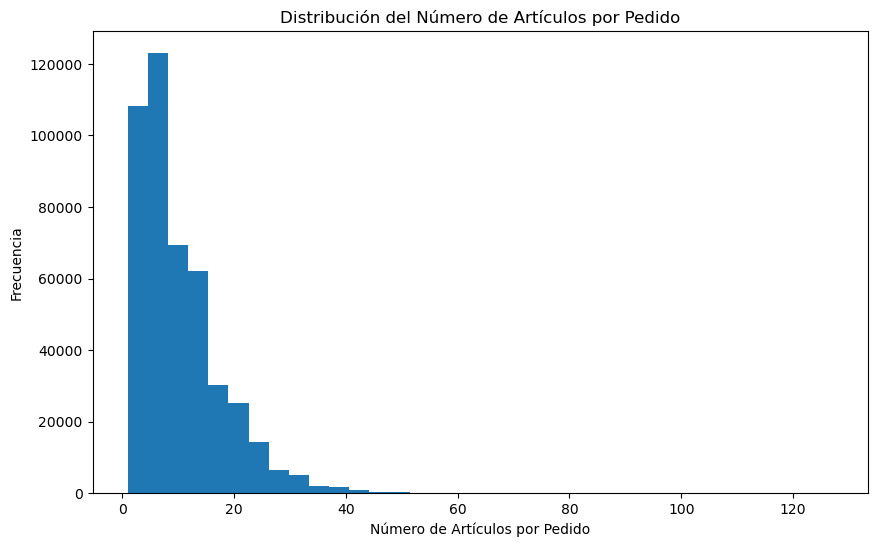

In [ ]:
# Graficar resultados
plt.figure(figsize=(10,6))
plt.hist(items_per_order,bins=35)
plt.title('Distribución del Número de Artículos por Pedido')
plt.xlabel('Número de Artículos por Pedido')
plt.ylabel('Frecuencia')
plt.show()
plt.show()

El mayor porcentaje de números de artículos por pedido se encuentra entre 0 y 13 aproximadamente. A partir de 20 artículos o incluso antes, la frecuencia cae estrepitosamente.

### ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
# Filtrar productos que volvieron a pedirse
reordered_products = order_products[order_products['reordered'] == 1]

In [ ]:
# Contar las veces que cada producto se volvió a pedir
top_reordered_products = reordered_products['product_id'].value_counts().head(20)

In [ ]:
# Tranformación a DF y reseteó del índice
top_reordered_df = top_reordered_products.to_frame().reset_index()
top_reordered_df.columns = ['product_id', 'reorder_count']

In [ ]:
# Agregar la columna product_name
top_reordered_with_names = top_reordered_df.join(products.set_index('product_id')['product_name'], on='product_id')
print(top_reordered_with_names)

    product_id  reorder_count              product_name
0        24852          55763                    Banana
1        13176          44450    Bag of Organic Bananas
2        21137          28639      Organic Strawberries
3        21903          26233      Organic Baby Spinach
4        47209          23629      Organic Hass Avocado
5        47766          18743           Organic Avocado
6        27845          16251        Organic Whole Milk
7        47626          15044               Large Lemon
8        27966          14748       Organic Raspberries
9        16797          13945              Strawberries
10       26209          13327                     Limes
11       22935          11145      Organic Yellow Onion
12       24964          10411            Organic Garlic
13       45007          10076          Organic Zucchini
14       49683           9538            Cucumber Kirby
15       28204           8989        Organic Fuji Apple
16        8277           8836  Apple Honeycrisp 

Filtré los productos que se han pedido nuevamente con la función booleana, lo convertí en un dataframe, reseteé los índices, renombré las columnas y finalmente le agregué los nombres e IDs de los productos. Banana es el producto que más se reordena, 55763 veces para ser exacto. Mientras Organic Half And Half es el vigésimo producto que más se reordena, siendo 8389 veces. 

### Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
# Agrupación por producto, el total de veces que se ordenó y se reordenó
product_order_stats = order_products.groupby('product_id').agg(
    total_orders=('reordered', 'size'),      # Total de veces que se pidió el producto
    total_reorders=('reordered', 'sum')      # Total de veces que se volvió a pedir (reordered = 1)
)

In [ ]:
# Cálculo de reordenamiento
product_order_stats['reorder_ratio'] = product_order_stats['total_reorders'] / product_order_stats['total_orders']

In [ ]:
# Imprimir agrupación
print(product_order_stats.head(10))

            total_orders  total_reorders  reorder_ratio
product_id                                             
1                    280             158       0.564286
2                     11               0       0.000000
3                     42              31       0.738095
4                     49              25       0.510204
7                      2               1       0.500000
8                     19               6       0.315789
9                     21              16       0.761905
10                   337             151       0.448071
11                    16              10       0.625000
12                    41              16       0.390244


### Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
# Agrupación por cliente y proporción de reordenamiento
orders_with_user = order_products.merge(instacart_orders[['order_id', 'user_id']], on='order_id')
client_order_stats = orders_with_user.groupby('user_id').agg(
    total_orders=('reordered', 'size'),      # Total de veces que se pidió el producto
    total_reorders=('reordered', 'sum')      # Total de veces que se volvió a pedir (reordered = 1)
)

In [ ]:
# Cálculo de reordenamiento
client_order_stats['reorder_rate'] = client_order_stats['total_reorders'] / client_order_stats['total_orders']
print(client_order_stats.head(10))

         total_orders  total_reorders  reorder_rate
user_id                                            
2                  26               1      0.038462
4                   2               0      0.000000
5                  12               8      0.666667
6                   4               0      0.000000
7                  14              13      0.928571
11                 15               3      0.200000
12                 12               3      0.250000
13                 23              13      0.565217
14                 61              22      0.360656
15                 13               7      0.538462


### ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
# Artículos que las personas ponen primero en sus carritos
print(order_products.sample(5))
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]
print(first_in_cart.sample(5))

         order_id  product_id  add_to_cart_order  reordered
3614835   1487260       12240                 10          0
4008960   2207166        6288                  7          0
1848262   2296105       18677                  1          1
2217806    809002       36086                  9          1
2078875   1221551       40723                  2          1
         order_id  product_id  add_to_cart_order  reordered
2542684   1889992       21137                  1          1
2214066   1241431       44980                  1          0
4165059   1956540       13176                  1          1
2605504    342958       24852                  1          1
4035573   2843553       26165                  1          1


In [ ]:
# Mayor a menor de los productos que son colocados primero en el carrito
top_first_in_cart = first_in_cart['product_id'].value_counts().head(20)
print(top_first_in_cart.head(5))

product_id
24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
Name: count, dtype: int64


In [ ]:
# Transformación a DF y agregar columna product_name
top_first_in_cart_df = top_first_in_cart.to_frame().reset_index()
top_first_in_cart_df.columns = ['product_id', 'count']
top_first_in_cart_with_names = top_first_in_cart_df.join(products.set_index('product_id')['product_name'], on='product_id')
print(top_first_in_cart_with_names)

    product_id  count                 product_name
0        24852  15562                       Banana
1        13176  11026       Bag of Organic Bananas
2        27845   4363           Organic Whole Milk
3        21137   3946         Organic Strawberries
4        47209   3390         Organic Hass Avocado
5        21903   3336         Organic Baby Spinach
6        47766   3044              Organic Avocado
7        19660   2336                 Spring Water
8        16797   2308                 Strawberries
9        27966   2024          Organic Raspberries
10       44632   1914   Sparkling Water Grapefruit
11       49235   1797          Organic Half & Half
12       47626   1737                  Large Lemon
13         196   1733                         Soda
14       38689   1397     Organic Reduced Fat Milk
15       26209   1370                        Limes
16       12341   1340                Hass Avocados
17        5785   1310  Organic Reduced Fat 2% Milk
18       27086   1309          

Primero filtré todos los productos que se ponen por primera vez. Conté sus valores con base en la columna 'product_id', para separarlos por tipo de producto y contar el valor de cada uno de ellos. Lo convertí a un DataFrame y reseteé su índice, le asigné nombres de columnas y finalmente extraje la columna products de otro DataFrame para agregarla al nuevo DataFrame, tal y como me lo pidieron las instrucciones. 

# Conclusiones:

Se realizó un EDA exhaustivo en cada DF. En este proyecto aprendí a identificar patrones que explican porqué muchas veces hay duplicados, ausentes, así como leer la actividad en ciertas circunstancias.